# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

# Image normalize 

# 轉換label 為OneHot Encoding

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 490s 3us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [19]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, idx, prediction=None, num=10):
    fig = plt.figure(figsize=(12, 14))
    if num > 25:
        num = 25 
    for i in range(idx, idx+num):
        ax = plt.subplot(5, 5, i - idx + 1)
        ax.imshow(images[i], cmap='binary')
        
        title = f"idx={i}, label={labels[i][0]}"
        if prediction is not None:
            title += f" => {prediction[i]}"
            
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
    plt.show()

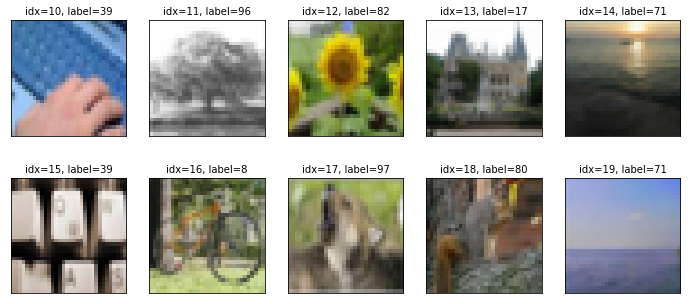

In [21]:
plot_images_labels_prediction(x_train, y_train, 10)

In [22]:
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

In [25]:
x_train[0][0][0], x_train_normalize[0][0][0]

(array([255, 255, 255], dtype=uint8), array([1., 1., 1.], dtype=float32))

In [27]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [28]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)
y_train_OneHot.shape, y_test_OneHot.shape

((50000, 100), (10000, 100))